 #                Women Like Me Data Mining (乘风破浪的姐姐组数据分析）

### Just For Fun!
#### The upcoming TV Show Women Like Me has attracted large number of people even one month before its first show. In this process, the douban group of the same contributed most of the topics and internet traffic. This project is designed just for fun to discover the behaviors of subscribers of this group and public interests on this TV show.
#### This project seeks to know the group from two aspects:
1. The activities of the subscribers: subscribers are most active at what time peirod of a day?
2. What kind of topics will attract most traffic?
   - Does longer topics will receive more replies?
   - Does thoes topics contain more popular words will receive more replies?

Let's see how the result answers these three questions!

## Part 1: Web Crawling

In [13]:
import pandas as pd
import numpy as np
import string

In [14]:
import requests
from lxml import etree
import re

In [70]:
from datetime import datetime
from datetime import timedelta

In [15]:
#get the url links for each page
def url_link(page):
    url_prefix = 'https://www.douban.com/group/689431/discussion?start='
    last_number = str(25*(page-1))
    return url_prefix+last_number

In [16]:
#get the links for all the top 250 topics
page = 1
all_tds_topic = []
all_tds_authors = []
all_reply_count = []

while page in range(1,11):
    url = url_link(page)
    headers ={
    'User-Agent': "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Mobile Safari/537.36"
}
    res = requests.get(url = url, headers = headers)
    text = res.text
    html = etree.HTML(text)
    td = html.xpath("//td[@class='title']")
    td1 = html.xpath("//td[@nowrap='nowrap']/a[@href]")
    td2 = html.xpath("//tr[@class='']")
    all_tds_topic = all_tds_topic+td
    all_tds_authors = all_tds_authors+td1
    all_reply_count = all_reply_count+td2
    page = page+1

In [17]:
print(all_tds_topic)
print(all_tds_authors)
print(all_reply_count)
len(all_reply_count)

[<Element td at 0x11d1f5cd0>, <Element td at 0x11d1f5820>, <Element td at 0x11d1f5910>, <Element td at 0x11d1f5eb0>, <Element td at 0x11d1f5d70>, <Element td at 0x11d1f5730>, <Element td at 0x11d1e9af0>, <Element td at 0x11d1e9230>, <Element td at 0x11dab3a50>, <Element td at 0x11dab3230>, <Element td at 0x11dab3500>, <Element td at 0x11dab3910>, <Element td at 0x11dab3e10>, <Element td at 0x11c4c7370>, <Element td at 0x11daa4140>, <Element td at 0x11daa45a0>, <Element td at 0x11daa4410>, <Element td at 0x11d1a5460>, <Element td at 0x11d1a5fa0>, <Element td at 0x11d1a5f00>, <Element td at 0x11d1a56e0>, <Element td at 0x11d1a5a00>, <Element td at 0x11d122410>, <Element td at 0x11d122230>, <Element td at 0x11d122870>, <Element td at 0x11d126230>, <Element td at 0x11da08d70>, <Element td at 0x11da085a0>, <Element td at 0x11dabb8c0>, <Element td at 0x11d1f5aa0>, <Element td at 0x11d1f5e10>, <Element td at 0x11d1f5320>, <Element td at 0x11d1f5280>, <Element td at 0x11d1f5dc0>, <Element td a

250

In [18]:
#get all the topics and their links
i=0
all_urls =[]
all_topics =[]

while i in range(0,len(all_tds_topic)):
    topic = all_tds_topic[i].xpath("./a")
    etree.tostring(topic[0], encoding='utf-8').decode('utf-8')
    title_url = topic[0].xpath("@href")
    title_topic = topic[0].xpath("@title")
    all_urls = all_urls+title_url
    all_topics = all_topics+title_topic
    i=i+1

In [19]:
#get all the post dates
count = 0
all_postdate = []

while count in range(0,250):
    topic_url = all_urls[count]
    headers ={
    'User-Agent': "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Mobile Safari/537.36"
}
    res = requests.get(url = topic_url, headers = headers)
    topic_text = res.text
    post_date = re.findall(r'<span class="timestamp">(.*?)</span>', topic_text)
    all_postdate = all_postdate+post_date
    count = count+1

In [20]:
#get all the reply counts
i=0
reply_counts = []

while i in range(0,len(all_reply_count)):
    re_text = etree.tostring(all_reply_count[i], encoding='utf-8').decode('utf-8')
    count = re.findall(r'<td nowrap="nowrap" class="r-count ">(.*?)</td>', re_text)
    if count==[]:
        count = ['0']
    print(count)
    reply_counts = reply_counts+count
    i=i+1

['22']
['19570']
['16']
['740']
['184']
['20']
['51']
['348']
['152']
['12']
['20']
['615']
['1553']
['111']
['250']
['149']
['11']
['5']
['124']
['37']
['624']
['22']
['410']
['1216']
['219']
['197']
['19']
['23']
['44']
['57']
['94']
['489']
['100']
['275']
['7']
['0']
['6']
['26']
['255']
['15']
['78']
['588']
['28']
['105']
['147']
['217']
['93']
['196']
['247']
['29']
['50']
['5']
['146']
['146']
['403']
['18']
['15']
['79']
['71']
['49']
['116']
['51']
['24']
['73']
['43']
['35']
['63']
['44']
['8']
['0']
['47']
['146']
['5']
['298']
['53']
['1268']
['229']
['52']
['10']
['30']
['2']
['363']
['20']
['9']
['160']
['412']
['44']
['73']
['14']
['57']
['104']
['521']
['30']
['89']
['63']
['139']
['16']
['193']
['31']
['106']
['106']
['4']
['79']
['21']
['48']
['143']
['10']
['54']
['71']
['27']
['12']
['6']
['57']
['31']
['13']
['27']
['164']
['414']
['521']
['25']
['112']
['20']
['770']
['206']
['7']
['176']
['48']
['7']
['43']
['386']
['33']
['2']
['4']
['103']
['15']
['20']
['39']

In [21]:
#get the information for all the authors
i = 0
all_authors = []
while i in range(0,len(all_tds_authors)):
    etree.tostring(all_tds_authors[i], encoding='utf-8').decode("utf-8")
    authors = all_tds_authors[i].xpath("@href")
    all_authors = all_authors + authors
    i=i+1

In [22]:
#put all the information into one dataframe
dist_1 = {
}
i = 0
while i in range(0, 250):
    dist = {
        'Topic'+str(i): all_topics[i],
    }
    dist_1.update(dist)
    i=i+1
    
dist_2 = {
}
i = 0
while i in range(0, 250):
    dist = {
        'Author'+str(i): all_authors[i],
    }
    dist_2.update(dist)
    i=i+1

dist_3 = {
}
i = 0
while i in range(0, 250):
    dist = {
        'Post_date'+str(i): all_postdate[i],
    }
    dist_3.update(dist)
    i=i+1
    
dist_4 = {
}
i = 0
while i in range(0, 250):
    dist = {
        'Reply_count'+str(i): reply_counts[i],
    }
    dist_4.update(dist)
    i=i+1

In [23]:
df_topics = pd.DataFrame(data=dist_1.values(), index=range(0,250),columns=['Topics'])
df_authors = pd.DataFrame(data=dist_2.values(), index=range(0,250),columns=['Authors'])
df_post_date = pd.DataFrame(data=dist_3.values(), index=range(0,250),columns=['Post Dates'])
df_reply_count = pd.DataFrame(data=dist_4.values(), index=range(0,250),columns=['Reply Counts'])

In [24]:
df1 = pd.merge(df_topics,df_authors, left_index=True, right_index=True)
df2 = pd.merge(df1,df_post_date, left_index=True, right_index=True)
df_final = pd.merge(df2,df_reply_count, left_index=True, right_index=True)

In [25]:
df_final.head()

,Topics,Authors,Post Dates,Reply Counts
0,沈梦辰姐姐感觉没有太多朋友关注 要是比赛不赢就要回去马上结婚啦,https://www.douban.com/people/216000704/,2020-05-16 06:51:28,22
1,防以后锁组手滑退出楼,https://www.douban.com/people/126750705/,2020-05-08 17:41:39,19570
2,你最想让谁当发起人？,https://www.douban.com/people/chenghaiyin1990/,2020-05-16 09:17:06,16
3,我想搞大事情,https://www.douban.com/people/214659997/,2020-05-13 20:08:47,740
4,原来吴昕已经女团出道过了,https://www.douban.com/people/78673342/,2020-05-15 07:59:01,184


In [26]:
def get_ID(link):
    return link.split('/')[-2]
df_final['ID']=df_final['Authors'].apply(get_ID)
df_final.head()

,Topics,Authors,Post Dates,Reply Counts,ID
0,沈梦辰姐姐感觉没有太多朋友关注 要是比赛不赢就要回去马上结婚啦,https://www.douban.com/people/216000704/,2020-05-16 06:51:28,22,216000704
1,防以后锁组手滑退出楼,https://www.douban.com/people/126750705/,2020-05-08 17:41:39,19570,126750705
2,你最想让谁当发起人？,https://www.douban.com/people/chenghaiyin1990/,2020-05-16 09:17:06,16,chenghaiyin1990
3,我想搞大事情,https://www.douban.com/people/214659997/,2020-05-13 20:08:47,740,214659997
4,原来吴昕已经女团出道过了,https://www.douban.com/people/78673342/,2020-05-15 07:59:01,184,78673342


In [27]:
# As we want to grab the information on daily basis, we should avoid different dataset using the same file name.
today = datetime.now()
today_time = pd.to_datetime(today)
time_list = [today_time.year]+[today_time.month]+[today_time.day]
time_str = str(today_time.year)+str(today_time.month)+str(today_time.day)
filename = 'women_like_me_'+time_str+'.csv'
df_final.to_csv(filename, index = False)

## Part 2: Activity Analysis based on Heatmap

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from collections import Counter
import nltk
import jieba
from pylab import mpl

In [3]:
#deal with post dates
df_final1 = pd.read_csv(filename)
df_final1['Post Dates']=pd.to_datetime(df_final1['Post Dates'])

In [4]:
df_final1['Month']=df_final1['Post Dates'].apply(lambda date: date.month)
df_final1['Day']=df_final1['Post Dates'].apply(lambda date: date.day)
df_final1['Hour']=df_final1['Post Dates'].apply(lambda date: date.hour)

In [5]:
df_final1.head()

,Topics,Authors,Post Dates,Reply Counts,ID,Month,Day,Hour
0,沈梦辰姐姐感觉没有太多朋友关注 要是比赛不赢就要回去马上结婚啦,https://www.douban.com/people/216000704/,2020-05-16 06:51:28,22,216000704,5,16,6
1,防以后锁组手滑退出楼,https://www.douban.com/people/126750705/,2020-05-08 17:41:39,19570,126750705,5,8,17
2,你最想让谁当发起人？,https://www.douban.com/people/chenghaiyin1990/,2020-05-16 09:17:06,16,chenghaiyin1990,5,16,9
3,我想搞大事情,https://www.douban.com/people/214659997/,2020-05-13 20:08:47,740,214659997,5,13,20
4,原来吴昕已经女团出道过了,https://www.douban.com/people/78673342/,2020-05-15 07:59:01,184,78673342,5,15,7


In [6]:
df_final1.describe()

,Reply Counts,Month,Day,Hour
count,250.000000,250.0,250.00000,250.000000
mean,235.736000,5.0,11.79600,14.596000
std,1263.862472,0.0,3.35371,6.349334
min,0.000000,5.0,3.00000,0.000000
25%,20.000000,5.0,9.00000,11.000000
50%,52.000000,5.0,13.00000,16.000000
75%,155.000000,5.0,15.00000,20.000000
max,19570.000000,5.0,16.00000,23.000000


In [47]:
df_final1['Day'].unique().min()
df_final1['Day'].unique().max()+1

17

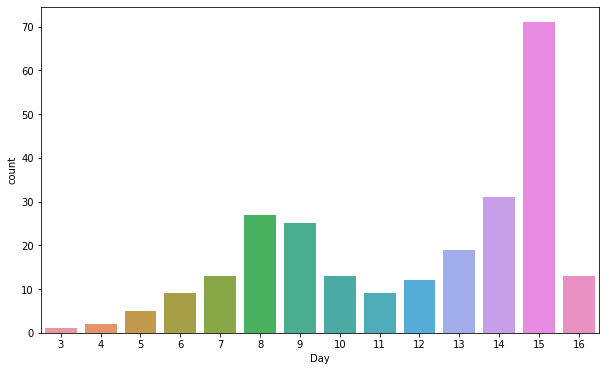

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(df_final1['Day'])

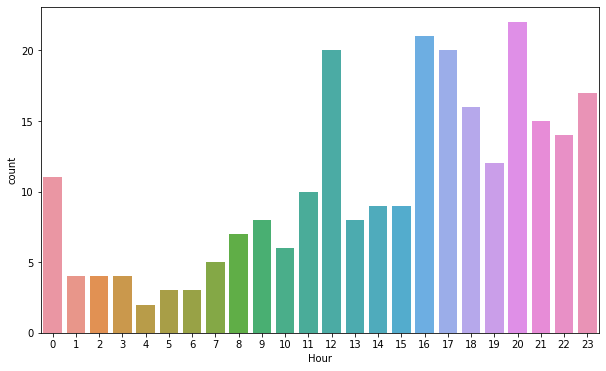

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(df_final1['Hour'])

In terms of days and hours, we would like to know which day at which time period is most active. In this case, we will use heatmap to visualize this.

In [9]:
#Create matrix to prepare for heatmap

def get_frequency(m,n):
    df = df_final1[df_final1['Day']==m][df_final1['Hour']==n]
    count = df.shape[0]
    return count

list_count = []
for m in range(df_final1['Day'].unique().min(),df_final1['Day'].unique().max()+1):
    for n in range(0,24):
        count = get_frequency(m,n)
        list_count = list_count+[count]
        n=n+1
    m=m+1

def list_slice(n):
    count1 = 24*(n-(df_final1['Day'].unique().min())
    count2 = count1+24
    list_s = list_count[count1:count2]
    return list_s

list_mats=[]
for i in range(df_final1['Day'].unique().min(),df_final1['Day'].unique().max()+1):
    list_mat = list_slice(i)
    list_mats=list_mats+[list_mat]
    i=i+1

list_mats.reverse()  

/Users/darcyluo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [10]:
list_mats

[[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 3, 0, 0, 0, 1, 1, 1, 1, 1, 3, 1, 2, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 1, 0, 1, 0, 1],
 [2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1],
 [3, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 3, 1, 1, 2, 1, 0, 1, 2, 0, 0, 3],
 [2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 4, 5, 0, 1, 1, 3, 2],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 3, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]

In [11]:
mats = np.mat(list_mats)
mats
arrays = np.array(list_mats)
arrays

array([[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 3, 0, 0, 0, 1, 1, 1, 1, 1, 3, 1,
        2, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2,
        2, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 1, 0, 1,
        0, 1],
       [2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0,
        1, 1],
       [3, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 3, 1, 1, 2, 1, 0, 1, 2, 0,
        0, 3],
       [2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 4, 5, 0, 1, 1,
        3, 2],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 3,
        0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 2],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0]])

In [12]:
#Create data frame based on the matrix
list_days_reverse=[]
i=0
while i in range(df_final1['Day'].unique().min(),df_final1['Day'].unique().max()+1):
    list_days_reverse = list_days_reverse+str(i)
    i=i+1

list_days=list_days_reverse.reverse()
list_hours=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
df_heatmap = pd.DataFrame(arrays, index=list_days, columns=list_hours)

In [13]:
df_heatmap

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
13,0,0,0,1,0,0,0,1,1,1,...,0,1,1,1,1,1,3,1,2,1
12,0,0,1,0,0,0,0,0,1,0,...,0,0,2,0,0,2,0,2,2,1
11,0,0,0,0,0,0,0,0,1,0,...,0,0,0,3,0,1,0,1,0,1
10,2,0,0,0,0,0,0,0,1,0,...,0,2,1,0,0,2,0,0,1,1
9,3,1,0,0,0,1,0,1,1,0,...,1,1,2,1,0,1,2,0,0,3
8,2,1,0,1,0,0,0,0,0,0,...,0,0,3,4,5,0,1,1,3,2
7,1,0,0,0,0,0,0,1,0,0,...,0,0,1,1,2,0,1,3,0,1
6,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,2
5,0,0,0,0,1,0,0,0,0,1,...,2,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


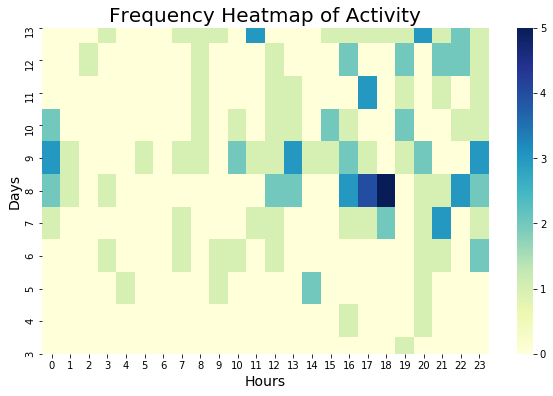

In [103]:
#Finally use the data frame to create the heatmap which shows the posting frequency at different hours of a day.
#We need to deal with the image name the same as we did for file name. 
today = datetime.now()
today_time = pd.to_datetime(today)
time_list = [today_time.year]+[today_time.month]+[today_time.day]
time_str = str(today_time.year)+str(today_time.month)+str(today_time.day)
image_name = 'Frequenct Heatmap '+time_str+'.png'
plt.figure(figsize=(10,6))
sns.heatmap(df_heatmap,cmap='YlGnBu')
plt.title(label='Frequency Heatmap of Activity', fontsize=20)
plt.xlabel(xlabel='Hours', fontsize=14)
plt.ylabel(ylabel='Days', fontsize=14)
#most commonly used cmap api:'YlGnBu', 'viridis', 'RdYlGn','rainbow'
plt.savefig(image_name)

From the heatmap shown above, we can see from the top 250 topics, we can see that people are most active during the time period from 4 PM to 7 PM. Although most of the posts are created in 5 days from May 13rd, it is obvious that people are most active at night.

Deal with the reply counts.
As for the reply counts, we consider two determining facts which influence the number of reply counts. The first one is the post date, in other words, how long did the topics exist? The other one is the content of the topics.
So, we first calculate the existing hours and then deal with the contents.

## Part 3: The relationship between the topic content and reply rates

In [14]:
from datetime import datetime
from datetime import timedelta

In [15]:
df_final1['Post Dates']=pd.to_datetime(df_final1['Post Dates'])

In [17]:
#Set the crawling time at present time
df_final1['Craw Time'] = datetime.now()

#Calculate the existing days and times for each topic
df_final1['Existing Time']=df_final1['Craw Time']-df_final1['Post Dates']

#Separate days and seconds of timedelta
Existing_days=[]
Existing_seconds=[]
dict_raw = {'Existing_days': [], 'Existing_seconds':[]}
i=0
while i in range (0,250):
    days = df_final1['Existing Time'].iloc[i].days
    seconds = df_final1['Existing Time'].iloc[i].seconds
    Existing_days = Existing_days+[days]
    Existing_seconds = Existing_seconds+[seconds]
    i=i+1

#Create data frame and merge it to the original one
dict_raw = {'Existing_days': Existing_days, 'Existing_seconds':Existing_seconds}
df_existingtime = pd.DataFrame(dict_raw, columns=['Existing_days','Existing_seconds'])
df_new = pd.merge(df_final1,df_existingtime, left_index=True, right_index=True)

#Calculate the reply rates which shous the number of reply counts per hour and then drop the redundant columns
df_new['Existing_hours']=df_new['Existing_days']*24+df_new['Existing_seconds']/3600
df_new['Reply Counts']=pd.to_numeric(df_new['Reply Counts'])
df_new['Reply_rates']=df_new['Reply Counts']/df_new['Existing_hours']
df_new.drop(columns=['Existing Time','Existing_days','Existing_seconds','Craw Time'], inplace=True)

#Let's see the general statistics about the new feature
df_new.describe()

,Reply Counts,Month,Day,Hour,Existing_hours,Reply_rates
count,250.000000,250.0,250.00000,250.000000,250.000000,250.000000
mean,235.736000,5.0,11.79600,14.596000,103.410323,1.877328
std,1263.862472,0.0,3.35371,6.349334,80.552996,6.660709
min,0.000000,5.0,3.00000,0.000000,7.987222,0.000000
25%,20.000000,5.0,9.00000,11.000000,28.544375,0.380143
50%,52.000000,5.0,13.00000,16.000000,72.794861,0.840170
75%,155.000000,5.0,15.00000,20.000000,177.925764,1.853830
max,19570.000000,5.0,16.00000,23.000000,310.539722,101.980936


In [18]:
#Now let's create some new features based on the topic
#Firstly, we wonder whether the length of each topic will influence the reply rates
content_length=[]
i=0
while i in range(0,250):
    length = len(df_new['Topics'].iloc[i])
    content_length=content_length+[length]
    i=i+1

content_dict={
    'content_length':content_length
}
df_length = pd.DataFrame(content_dict, columns=['content_length'])
df_update=pd.merge(df_new, df_length, left_index=True, right_index=True)

Text(0.5, 0, 'reply_rates')

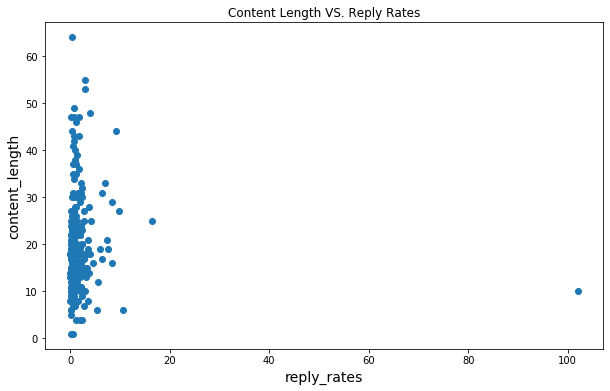

In [20]:
#Let's plot a scatter graph about length of content and reply rates
figure_name = 'Sactter Plot '+ time_str+'.png'
plt.figure(figsize=(10,6))
plt.scatter(df_update['Reply_rates'], df_update['content_length'])
plt.title(label='Content Length VS. Reply Rates')
plt.ylabel(ylabel='content_length', fontsize=14)
plt.xlabel(xlabel='reply_rates', fontsize=14)
plt.savefig(figure_name)

We find in the graph above that, due to the wide range of our dataset (especially for the outlier point), many data points are too narrowed to see details of the distribution. In this case, we might want to interact with the graph to see more details of some parts of the graph.

In [21]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [22]:
df_update.iplot(kind='scatter',x='Reply_rates',y='content_length',mode='markers',size=10)

It is obvious that the distribution is pretty random even we zoom in the graph to see more details of it.

In [23]:
df_update[df_update['Reply_rates']>100]

,Topics,Authors,Post Dates,Reply Counts,ID,Month,Day,Hour,Existing_hours,Reply_rates,content_length
1,防以后锁组手滑退出楼,https://www.douban.com/people/126750705/,2020-05-08 17:41:39,19570,126750705,5,8,17,191.898611,101.980936,10


The distribution between content length and reply rates is very random and there is an outlier shown in the graph. After searching through the dataset, we find that the topic of this outlier is a special topic which is created for subscribers not to unsubscribe the group (as the group has been locked). And we can see that most of the reply rates range around zero no matter how long the topic is. 

In [24]:
#deal with the content
topics = []
for i in df_update['Topics']:
    topics.append(i)

topics_remove = []
for i in topics:
    if i not in topics_remove:
        topics_remove.append(i)

In [25]:
topics_s=[]
for topic in topics_remove:
    topics_cut = jieba.lcut(topic)
    topics_s.append(topics_cut)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/y8/321pddfd34nb6ysrj4jfj5s80000gn/T/jieba.cache
Loading model cost 1.164 seconds.
Prefix dict has been built successfully.


In [26]:
# Load stop words list

stopwords = [line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8').readlines()]

# Remove stopwors in in the topic list

topics_clean=[]
for line in topics_s:
    line_clean = []
    for word in line:
        if word not in stopwords:
            line_clean.append(word)
    topics_clean.append(line_clean)
    
# remove the repeated words in each line of the list

topics_clean_dist = []
for line in topics_clean:
    line_clean_dist = []
    for word in line:
        if word not in line_clean_dist:
            line_clean_dist.append(word)
    topics_clean_dist.append(line_clean_dist)

In [27]:
# convert all the words into one list

allwords_list = []
for line in topics_clean_dist:
    for word in line:
        allwords_list.append(word)

# Convert the list into dataframe

df_allwords = pd.DataFrame({'allwords': allwords_list})

# Count the repeated words

word_count = df_allwords['allwords'].value_counts().reset_index()
word_count.columns = ['word', 'count']

In [28]:
word_count.head(50)
[word_count['word'].iloc[0]]+[]+[word_count['word'].iloc[1]]

['姐姐', ' ']

(-0.5, 399.5, 199.5, -0.5)

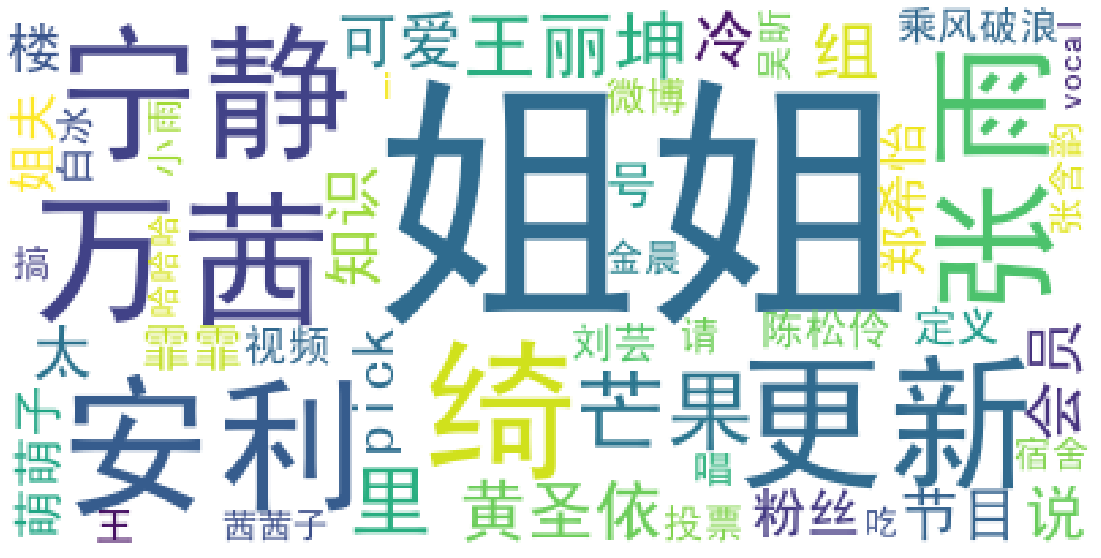

In [30]:
# Use the Word Cloud library to visualize word frequencies

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

#Create word cloud subject and set the parameters within the word cloud

wordcloud=WordCloud(font_path='SimHei.ttf', background_color="white", max_font_size=100, margin=1)

#Fit word frequencies in word cloud

word_frequence={x[0]:x[1] for x in word_count.head(50).values}
wordcloud=wordcloud.fit_words(word_frequence)
word_frequence

#Visualize using the default mode
cloud_name = 'Word Cloud '+time_str+'.png'
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(cloud_name)

After exploring the content of the topics, we find that subscribers might have preference on specific topics such as those relate to the popular paticipants and those about the most updated events. In this case, we consider calculated a weighted score for each topic with which we give each key word a specific point according to our previous analysis on word frequencies.

In [31]:
word_count.head(50).describe()

,count
count,50.000000
mean,8.260000
std,8.426901
min,4.000000
25%,5.000000
50%,6.000000
75%,7.750000
max,60.000000


We consider the top 50 words as key words and assign different weights according to their rankings. 
1. The first level of weights are thoes words ranking top 10, the second level are thoes from top 10 to top 20 and so on.
2. We assign weighted scores in this ways because it is manageable if we want to do the research on daily basis without changing scoring standards each time as the content of the word_count list may change every day. 
3. Taking the changing content of the top 50 word counts into consideration, we will create list of top 50 words for each day and track the changes by comparing changes in the word list.

In [32]:
#Create 5 word lists according to different rankings.

Score_5 = []
Score_4 = []
Score_3 = []
Score_2 = []
Score_1 = []
i=0
while i in range(0,50):
    if i <= 9:
        Score_5 = Score_5 + [word_count['word'].iloc[i]]
    elif (i > 9 and i <= 19):
        Score_4 = Score_4 + [word_count['word'].iloc[i]]
    elif (i >19 and i <= 29):
        Score_3 = Score_3 + [word_count['word'].iloc[i]]
    elif (i >29 and i <= 39):
        Score_2 = Score_2 + [word_count['word'].iloc[i]]
    elif (i > 39):
        Score_1 = Score_1 + [word_count['word'].iloc[i]]
    i=i+1

For next step, we will start calculating the "importance scores" for each line of the topics using the cut and cleaned topic list (but without removing the repeated topics) which we have used before. The reason why we calculate the so-called importance scores is that we are wondring whether thoes words which are mentioned more frequently will attract faster and more reply counts.

Our calculating method is to find key words in each topic and add up the scores of these words in order to obtain the importance score for each topic. Other words which are not listed key words will be assigned score 0.

In [33]:
#Here we need to recreate a cleaned topics list based on our needs. Different from the cleaned list we used to count words previously,this time we do not care repeated topics and repeated words within topics.

topics = []
for i in df_update['Topics']:
    topics.append(i)

topics_s=[]
for topic in topics:
    topics_cut = jieba.lcut(topic)
    topics_s.append(topics_cut)

stopwords = [line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8').readlines()]

topics_clean=[]
for line in topics_s:
    line_clean = []
    for word in line:
        if word not in stopwords:
            line_clean.append(word)
    topics_clean.append(line_clean)

len(topics_clean)

250

In [34]:
#Calculate the topic scores
def topic_score(wordlist):
    topic_score=0
    i=0
    while i in range(0, len(wordlist)):
        for word in wordlist:
            if word in Score_5:
                topic_score = topic_score+5
            elif word in Score_4:
                topic_score = topic_score+4
            elif word in Score_3:
                topic_score = topic_score+3
            elif word in Score_2:
                topic_score = topic_score+2
            elif word in Score_1:
                topic_score = topic_score+1
                break
        i=i+1
    return topic_score

score_list=[]
i=0
while i in range(0,len(topics_clean)):
    score_list.append(topic_score(topics_clean[i]))
    i=i+1

df_scores = pd.DataFrame(score_list, columns=['Importance Scores'])

In [35]:
df_scores

,Importance Scores
0,154
1,18
2,0
3,3
4,3
...,...
245,126
246,60
247,60
248,48


In [36]:
df_withscores = pd.merge(df_update, df_scores, left_index=True, right_index=True)

Text(0.5, 0, 'Reply Rates')

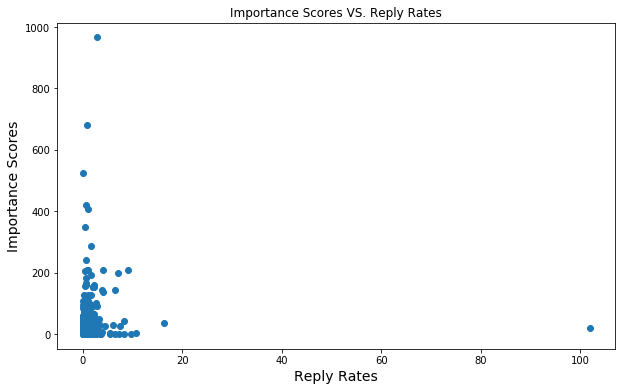

In [38]:
#Let's plot a scatter graph about importance scores and reply rates
figure2_name = 'Importance Scores '+ time_str+'.png'
plt.figure(figsize=(10,6))
plt.scatter(df_withscores['Reply_rates'], df_withscores['Importance Scores'])
plt.title(label='Importance Scores VS. Reply Rates')
plt.ylabel(ylabel='Importance Scores', fontsize=14)
plt.xlabel(xlabel='Reply Rates', fontsize=14)
plt.savefig(figure2_name)

In [39]:
#Due the outlier, let's create an interactable graph to see more details of the graph.

df_withscores.iplot(kind='scatter',x='Reply_rates',y='Importance Scores',mode='markers',size=10)

Again, It is obvious that the distribution is pretty random even we zoom in the graph to see more details of it.

## Reflection
Although this project is designed just for fun, we still need to reflect on the weakness of our analysis. The biggest weakness comes from 2 sources:
1. The small size of the dataset. As Douban limits daily crawling up to 250 items per IP per day, we can only obtain the top 250 topics for daily analysis. But, because this group is just newly built and the number of subscibers is also not large, 250 topics could easily catch the general trending events each day.

2. When we deal with topic content, we only use features such as length of the topics and the importance scores of the topics which we mannually calculate just according to the word frequencies. These two features might not really catch the most important point that attracts audiences. In other words, it is not important how the topics are organized but how the detailed content containning in each topic that determines whether people will reply. In this case, the following research should include the detailed content of each topic and this will involve much more technologies such as image analysis (it might be another important factor in determining reply counts that containning images often receive much more reply counts than not containing images).